**House Real estate data from Indian cities**

Dataset Link:
 [https://www.kaggle.com/datasets/rakkesharv/real-estate-data-from-7-indian-cities](https://)

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df=pd.read_csv("Real Estate Data V21.csv")

In [171]:
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


**Having a look on how the dataset looks like**

**Initial Data Inspection**

In [172]:
df.shape

(14528, 9)

The dataset has 14528 rows and 9 columns

In [173]:
df.columns

Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Description', 'Baths', 'Balcony'],
      dtype='object')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14528 non-null  object 
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Description     14528 non-null  object 
 7   Baths           14528 non-null  int64  
 8   Balcony         14528 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1021.6+ KB


6 columns contains string values and 3 columns contain numeric values

In [175]:
df.describe()

,Total_Area,Price_per_SQFT,Baths
count,14528.000000,14528.000000,14528.000000
mean,1297.916988,11719.456222,2.751239
std,1245.694305,49036.068632,0.898243
min,70.000000,0.000000,1.000000
25%,650.000000,4480.000000,2.000000
50%,1000.000000,6050.000000,3.000000
75%,1439.000000,9312.500000,3.000000
max,35000.000000,999000.000000,6.000000


Provides insights into numeric columns (like Total Area, Price per SQFT,Baths)

In [176]:
df.isnull().sum()

,0
Name,0
Property Title,0
Price,0
Location,0
Total_Area,0
Price_per_SQFT,0
Description,0
Baths,0
Balcony,0


There are no missing values in the dataset

In [177]:
df['Location'].value_counts().head(10)

,count
Location,
"Sector 12 Dwarka, New Delhi",44
"Wagholi, Pune",39
"Bannerughatta, Bangalore",35
"Horamavu Agara, Horamavu,Bangalore",32
"Chakan, Pune",32
"Mattanahalli, Bangalore",31
"Veer Sandra, Electronic City,Bangalore",31
"Yelahanka, Bangalore",30
"Veer Sandra, Electronic City Phase II,Bangalore",29


Above are the top 10 locations by count

In [178]:
# Function to convert to lakhs
def convert_price_to_lakhs(price_str):
    if pd.isnull(price_str):
        return np.nan

    price_str = str(price_str).replace('₹', '').replace(',', '').strip().lower()

    if 'cr' in price_str:
        try:
            num = float(price_str.replace('cr', '').strip())
            return round(num * 100, 2)
        except:
            return np.nan
    elif 'l' in price_str:
        try:
            num = float(price_str.replace('l', '').strip())
            return round(num, 2)
        except:
            return np.nan
    else:
        return np.nan  # unknown format

# Apply to DataFrame
df['Price'] = df['Price'].apply(convert_price_to_lakhs)

df.rename(columns={'Price': 'Price (in Lakhs)'}, inplace=True)


conversion of values in Price column in one unit i.e Lakhs

In [179]:
df.head()

,Name,Property Title,Price (in Lakhs),Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",199.0,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,225.0,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",100.0,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,333.0,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",48.0,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [180]:
df.isnull().sum()

,0
Name,0
Property Title,0
Price (in Lakhs),5
Location,0
Total_Area,0
Price_per_SQFT,0
Description,0
Baths,0
Balcony,0


5 missing values identified in 'Price (in Lakhs)' column so we will drop that rows

In [181]:
df.dropna(subset=['Price (in Lakhs)'], inplace=True)

In [182]:
import re
# --- Function to extract BHK as integer ---
def extract_bhk_from_title(title):
    match = re.search(r'(\d+)\s*BHK', str(title), re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None   # return None if no BHK found

# --- Apply function to Property Title column ---
df['BHK'] = df['Property Title'].apply(extract_bhk_from_title)

# --- Drop rows with missing BHK ---
df = df.dropna(subset=['BHK'])

# --- Convert BHK to integer type ---
df['BHK'] = df['BHK'].astype(int)

Extracted No. of rooms from the 'Property Title' column and stored in a new  column 'BHK'

In [183]:
df.head()

,Name,Property Title,Price (in Lakhs),Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,BHK
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",199.0,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,4
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,225.0,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,10
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",100.0,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,3
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,333.0,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,7
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",48.0,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,2


In [184]:
df.isnull().sum()

,0
Name,0
Property Title,0
Price (in Lakhs),0
Location,0
Total_Area,0
Price_per_SQFT,0
Description,0
Baths,0
Balcony,0
BHK,0


**Exploratory Data Analysis (EDA)**

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
print("Top 5 Most Expensive Properties:")
df[['Name', 'Location', 'Price (in Lakhs)']].sort_values(by='Price (in Lakhs)', ascending=False).head()

Top 5 Most Expensive Properties:


,Name,Location,Price (in Lakhs)
6053,"Yashavantapura, Kolar, Bangalore","Yashavantapura, Kolar, Bangalore",8400.0
12952,"Beadonpura, Karol Bagh,New Delhi","Beadonpura, Karol Bagh,New Delhi",6500.0
11154,"Balewadi, Pune","Balewadi, Pune",4020.0
3537,"Central Telecom Society, Bangalore","Central Telecom Society, Bangalore",3500.0
3227,Skyline City Tower,"Maruthi Nagar, Attiguppe,Bangalore",3500.0


In [187]:
print("Top 5 Cheapest Per Sqft Properties:")
df[['Name', 'Location', 'Price_per_SQFT']].sort_values(by='Price_per_SQFT').head()

Top 5 Cheapest Per Sqft Properties:


,Name,Location,Price_per_SQFT
9163,"Ghola, Agarpara,Kolkata","Ghola, Agarpara,Kolkata",1000.0
1524,"Manimangalam, Chennai","Manimangalam, Chennai",1000.0
5913,"Doddabele, Bangalore","Doddabele, Bangalore",1000.0
9088,"Srijani Pally, Duttapukur,Kolkata","Srijani Pally, Duttapukur,Kolkata",1000.0
12786,"Kashmere Gate, New Delhi","Kashmere Gate, New Delhi",1000.0


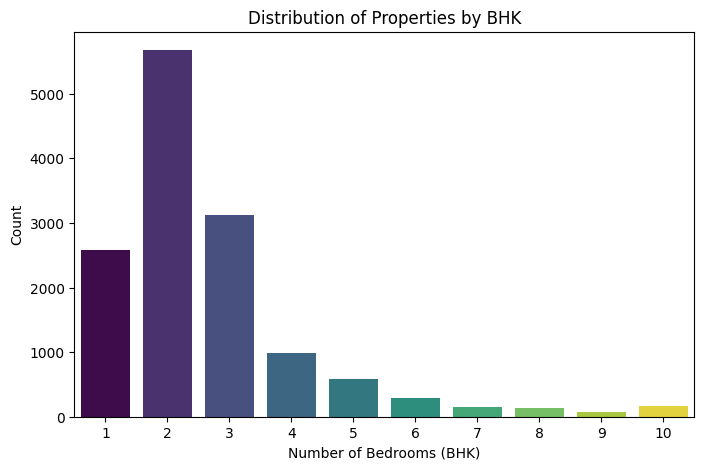

In [188]:
plt.figure(figsize=(8,5))
sns.countplot(x="BHK", data=df, hue="BHK", palette="viridis", legend=False)
plt.title("Distribution of Properties by BHK")
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Count")
plt.show()

Insight: Most listed properties are 2BHK and 3BHK, indicating that mid-sized homes dominate the market compared to smaller (1BHK) or larger (4BHK+) units.

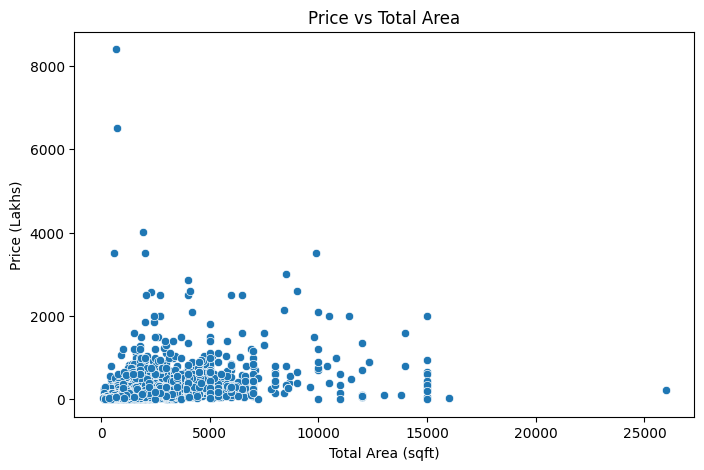

In [189]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Total_Area', y='Price (in Lakhs)', data=df)
plt.title('Price vs Total Area')
plt.xlabel('Total Area (sqft)')
plt.ylabel('Price (Lakhs)')
plt.show()

Insight: Price generally increases with Total Area, with some outliers.

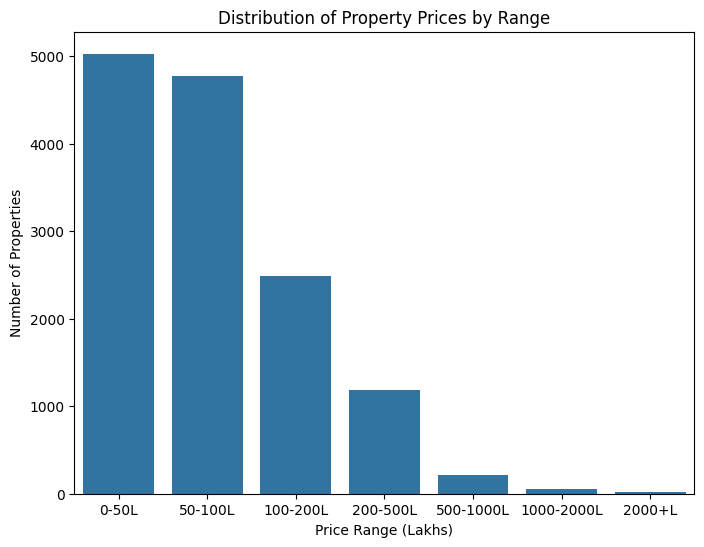

In [190]:
# Define bins & labels
bins = [0, 50, 100, 200, 500, 1000, 2000, df['Price (in Lakhs)'].max()]
labels = ["0-50L", "50-100L", "100-200L", "200-500L", "500-1000L", "1000-2000L", "2000+L"]

# Create temporary binned series
price_range = pd.cut(df['Price (in Lakhs)'], bins=bins, labels=labels, include_lowest=True)

# Plot countplot
plt.figure(figsize=(8,6))
sns.countplot(x=price_range)
plt.title("Distribution of Property Prices by Range")
plt.xlabel("Price Range (Lakhs)")
plt.ylabel("Number of Properties")
plt.show()

Insight: Majority of the properties in the dataset are in the lower price ranges (0-50L and 50-100L), with significantly fewer properties in the higher price ranges.

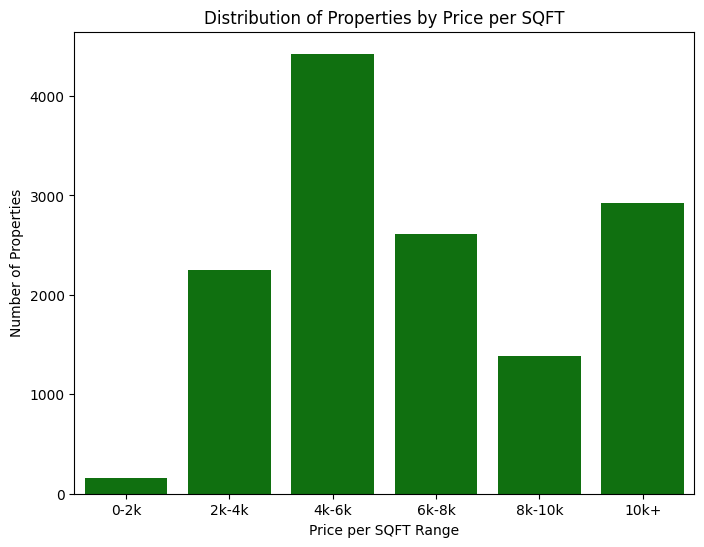

In [191]:
# Define bins and labels
bins = [0, 2000, 4000, 6000, 8000, 10000, df['Price_per_SQFT'].max()]
labels = ["0-2k", "2k-4k", "4k-6k", "6k-8k", "8k-10k", "10k+"]

# Create a temporary binned series (without adding to df)
price_per_sqft_range = pd.cut(df['Price_per_SQFT'], bins=bins, labels=labels, include_lowest=True)

# Plot countplot directly
plt.figure(figsize=(8,6))
sns.countplot(x=price_per_sqft_range,color="green")
plt.title("Distribution of Properties by Price per SQFT")
plt.xlabel("Price per SQFT Range")
plt.ylabel("Number of Properties")
plt.show()


Most common price per square feet ranges are between 4k to 6k

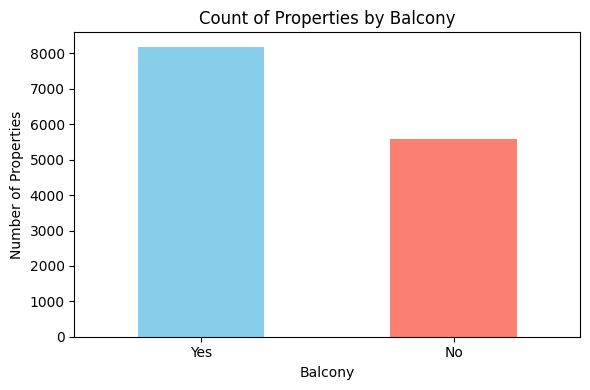

In [192]:
plt.figure(figsize=(6, 4))
df['Balcony'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Properties by Balcony')
plt.xlabel('Balcony')
plt.ylabel('Number of Properties')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Insight: There are more properties with balconies than properties without balconies in the dataset.

In [193]:
##Conversion of categorical to numerical
df['Balcony'] = df['Balcony'].map({'Yes': 1, 'No': 0})

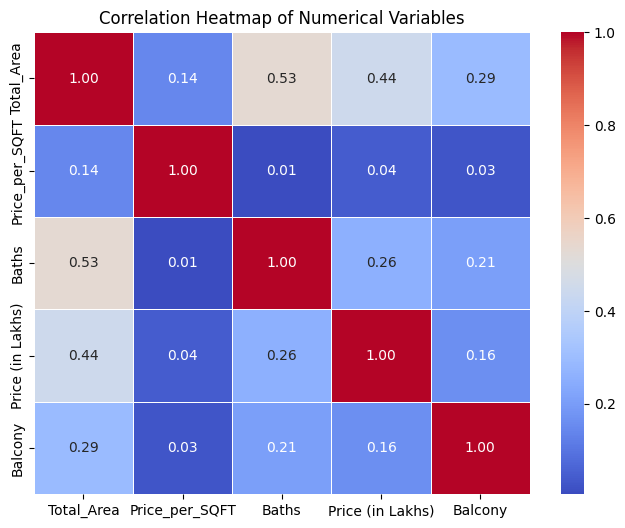

In [194]:
numerical_cols = ['Total_Area', 'Price_per_SQFT', 'Baths', 'Price (in Lakhs)', 'Balcony']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Insight: Total Area and Baths have the strongest positive correlation, while Price per SQFT has weak correlations with other numerical variables.

In [195]:
df.head()

,Name,Property Title,Price (in Lakhs),Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,BHK
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",199.0,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,1,4
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,225.0,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,1,10
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",100.0,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,0,3
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,333.0,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,1,7
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",48.0,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,1,2


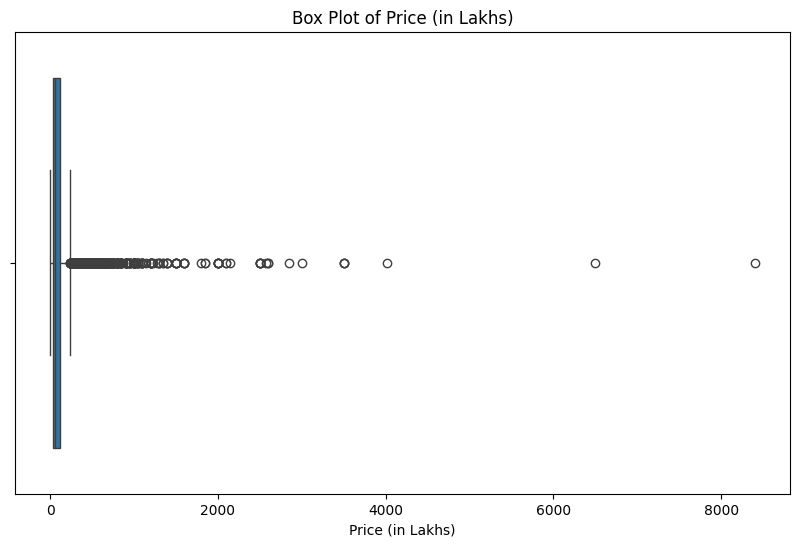

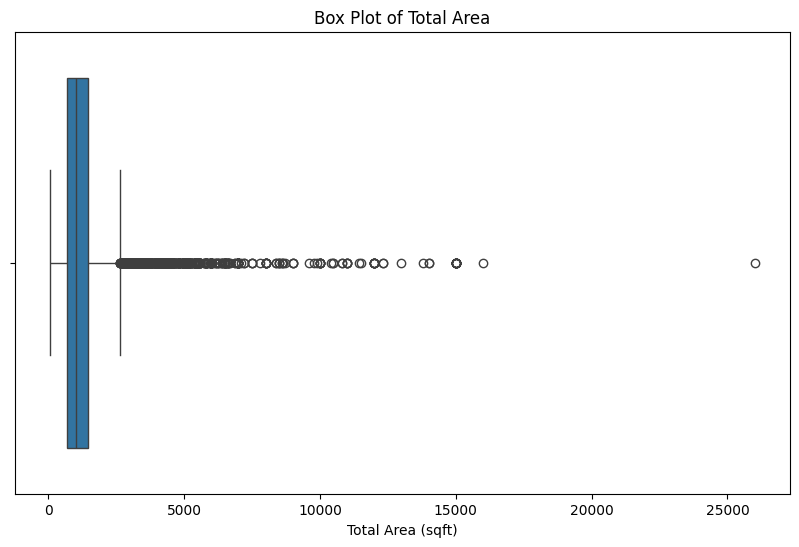

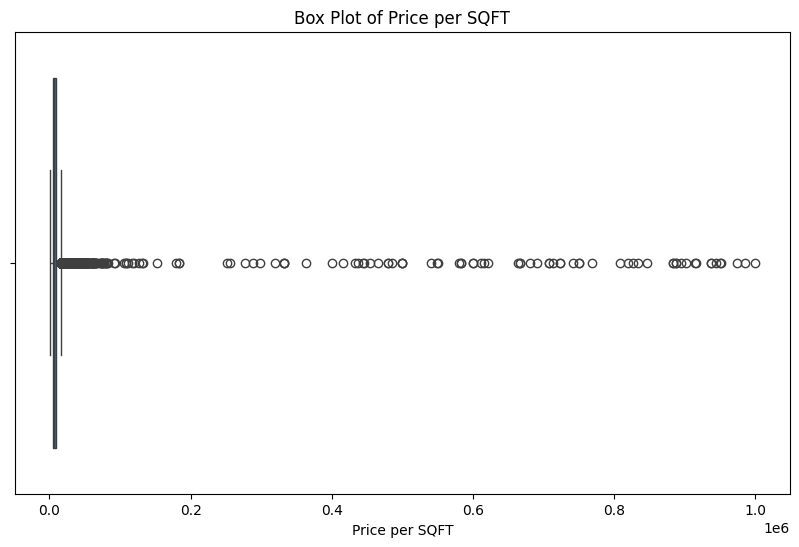

In [196]:
# Visualize the distribution of Price (in Lakhs) to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price (in Lakhs)'])
plt.title('Box Plot of Price (in Lakhs)')
plt.xlabel('Price (in Lakhs)')
plt.show()

# Visualize the distribution of Total_Area to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total_Area'])
plt.title('Box Plot of Total Area')
plt.xlabel('Total Area (sqft)')
plt.show()

# Visualize the distribution of Price_per_SQFT to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price_per_SQFT'])
plt.title('Box Plot of Price per SQFT')
plt.xlabel('Price per SQFT')
plt.show()

In [197]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    return df_cleaned

# Remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df, 'Price (in Lakhs)')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Total_Area')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Price_per_SQFT')

# Update the original DataFrame
df = df_cleaned

print("Shape of the DataFrame after removing outliers:", df.shape)

Shape of the DataFrame after removing outliers: (10797, 10)


Data Preprocessing

In [198]:
def extract_property_type(title):
    title = title.lower()
    if "flat" in title:
        return "Flat"
    elif "independent house" in title:
        return "Independent House"
    elif "villa" in title:
        return "Villa"
    elif "plot" in title:
        return "Plot"
    else:
        return "Other"

In [199]:
df["Property_Type"] = df["Property Title"].apply(extract_property_type)

In [200]:
# Extract city from Location
df["City"] = df["Location"].apply(lambda x: x.split(",")[-1].strip())
# Check unique cities
print(df["City"].unique())

['Chennai' 'Bangalore' 'Hyderabad' 'Mumbai' 'Thane' 'Kolkata' 'Pune'
 'New Delhi']


In [201]:
# 1. Extract location excluding the city and replace in the original Location column
df['Location'] = df['Location'].apply(lambda x: ','.join(x.split(',')[:-1]).strip())

df.head()


,Name,Property Title,Price (in Lakhs),Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,BHK,Property_Type,City
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",100.00,"Kasthuribai Nagar, West Tambaram",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,0,3,Flat,Chennai
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",48.00,Avadi,960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,1,2,Flat,Chennai
5,KG Earth Homes,"2 BHK Flat for sale in Siruseri, Chennai",40.00,Siruseri,940,4250.0,"Price negotiable. Big hall, big balcony, gated...",3,0,2,Flat,Chennai
6,"THIRAN FLATS ,Gowrivakkam, Sembakkam,Chennai","2 BHK Flat for sale in Sembakkam, Chennai",60.00,"THIRAN FLATS ,Gowrivakkam, Sembakkam",880,6820.0,2 BHK Apartment for sale in Chennai. This prop...,3,1,2,Flat,Chennai
7,TK Jasmine Grove,3 BHK Independent House for sale in Mahindra W...,72.35,Mahindra World City,1700,4250.0,A 3 BHK Independent House for sale in Mahindra...,3,1,3,Independent House,Chennai


In [202]:
# Apply Label Encoding on the Location column
label_encoder = LabelEncoder()
df['Location_Encoded'] = label_encoder.fit_transform(df['Location'])

# Store the label encoding mapping in a dictionary
location_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [203]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoders
city_encoder = LabelEncoder()
property_encoder = LabelEncoder()

# Fit and transform
df["City_Encoded"] = city_encoder.fit_transform(df["City"])
df["Property_Encoded"] = property_encoder.fit_transform(df["Property_Type"])

# Store mappings
city_mapping = dict(zip(city_encoder.classes_, city_encoder.transform(city_encoder.classes_)))
property_mapping = dict(zip(property_encoder.classes_, property_encoder.transform(property_encoder.classes_)))

print("City Mapping:", city_mapping)
print("Property Mapping:", property_mapping)



City Mapping: {'Bangalore': np.int64(0), 'Chennai': np.int64(1), 'Hyderabad': np.int64(2), 'Kolkata': np.int64(3), 'Mumbai': np.int64(4), 'New Delhi': np.int64(5), 'Pune': np.int64(6), 'Thane': np.int64(7)}
Property Mapping: {'Flat': np.int64(0), 'Independent House': np.int64(1), 'Villa': np.int64(2)}


In [204]:
df.head()

,Name,Property Title,Price (in Lakhs),Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,BHK,Property_Type,City,Location_Encoded,City_Encoded,Property_Encoded
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",100.00,"Kasthuribai Nagar, West Tambaram",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,0,3,Flat,Chennai,2187,1,0
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",48.00,Avadi,960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,1,2,Flat,Chennai,465,1,0
5,KG Earth Homes,"2 BHK Flat for sale in Siruseri, Chennai",40.00,Siruseri,940,4250.0,"Price negotiable. Big hall, big balcony, gated...",3,0,2,Flat,Chennai,4500,1,0
6,"THIRAN FLATS ,Gowrivakkam, Sembakkam,Chennai","2 BHK Flat for sale in Sembakkam, Chennai",60.00,"THIRAN FLATS ,Gowrivakkam, Sembakkam",880,6820.0,2 BHK Apartment for sale in Chennai. This prop...,3,1,2,Flat,Chennai,4792,1,0
7,TK Jasmine Grove,3 BHK Independent House for sale in Mahindra W...,72.35,Mahindra World City,1700,4250.0,A 3 BHK Independent House for sale in Mahindra...,3,1,3,Independent House,Chennai,2632,1,1


In [205]:
# 1. Log Transformation for Price in Lakhs (Price is already in lakhs)
df['Log_Price'] = np.log(df['Price (in Lakhs)'] + 1)  # Add +1 to avoid log(0) errors

# 2. Log Transformation for Total_Area
df['Log_Total_Area'] = np.log(df['Total_Area'] + 1)  # Add +1 to avoid log(0) errors

df['Log_Price_per_sqft']=np.log(df['Price_per_SQFT'] + 1)
# Check the changes
df.head()


,Name,Property Title,Price (in Lakhs),Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,BHK,Property_Type,City,Location_Encoded,City_Encoded,Property_Encoded,Log_Price,Log_Total_Area,Log_Price_per_sqft
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",100.00,"Kasthuribai Nagar, West Tambaram",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,0,3,Flat,Chennai,2187,1,0,4.615121,7.186144,8.933400
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",48.00,Avadi,960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,1,2,Flat,Chennai,465,1,0,3.891820,6.867974,8.517393
5,KG Earth Homes,"2 BHK Flat for sale in Siruseri, Chennai",40.00,Siruseri,940,4250.0,"Price negotiable. Big hall, big balcony, gated...",3,0,2,Flat,Chennai,4500,1,0,3.713572,6.846943,8.354910
6,"THIRAN FLATS ,Gowrivakkam, Sembakkam,Chennai","2 BHK Flat for sale in Sembakkam, Chennai",60.00,"THIRAN FLATS ,Gowrivakkam, Sembakkam",880,6820.0,2 BHK Apartment for sale in Chennai. This prop...,3,1,2,Flat,Chennai,4792,1,0,4.110874,6.781058,8.827761
7,TK Jasmine Grove,3 BHK Independent House for sale in Mahindra W...,72.35,Mahindra World City,1700,4250.0,A 3 BHK Independent House for sale in Mahindra...,3,1,3,Independent House,Chennai,2632,1,1,4.295243,7.438972,8.354910


In [206]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the relevant numerical columns
df[['Log_Price', 'Log_Total_Area','Log_Price_per_sqft','Baths', 'Balcony']] = scaler.fit_transform(df[['Log_Price', 'Log_Total_Area', 'Price_per_SQFT', 'Baths', 'Balcony']])

# Check the changes
df.head()

,Name,Property Title,Price (in Lakhs),Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,BHK,Property_Type,City,Location_Encoded,City_Encoded,Property_Encoded,Log_Price,Log_Total_Area,Log_Price_per_sqft
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",100.00,"Kasthuribai Nagar, West Tambaram",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",0.480229,-1.079767,3,Flat,Chennai,2187,1,0,1.024413,0.803065,0.505724
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",48.00,Avadi,960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",0.480229,0.926125,2,Flat,Chennai,465,1,0,-0.180563,0.072609,-0.471688
5,KG Earth Homes,"2 BHK Flat for sale in Siruseri, Chennai",40.00,Siruseri,940,4250.0,"Price negotiable. Big hall, big balcony, gated...",0.480229,-1.079767,2,Flat,Chennai,4500,1,0,-0.477514,0.024326,-0.755819
6,"THIRAN FLATS ,Gowrivakkam, Sembakkam,Chennai","2 BHK Flat for sale in Sembakkam, Chennai",60.00,"THIRAN FLATS ,Gowrivakkam, Sembakkam",880,6820.0,2 BHK Apartment for sale in Chennai. This prop...,0.480229,0.926125,2,Flat,Chennai,4792,1,0,0.184368,-0.126934,0.217805
7,TK Jasmine Grove,3 BHK Independent House for sale in Mahindra W...,72.35,Mahindra World City,1700,4250.0,A 3 BHK Independent House for sale in Mahindra...,0.480229,0.926125,3,Independent House,Chennai,2632,1,1,0.491515,1.383508,-0.755819


In [207]:
# Create a new dataframe with all necessary columns for prediction
df_pred= df[['Log_Total_Area', 'Baths', 'Balcony', 'BHK',"City_Encoded","Location_Encoded","Property_Encoded",'Log_Price_per_sqft','Log_Price']]

# Check the new dataframe
df_pred.head()


,Log_Total_Area,Baths,Balcony,BHK,City_Encoded,Location_Encoded,Property_Encoded,Log_Price_per_sqft,Log_Price
2,0.803065,0.480229,-1.079767,3,1,2187,0,0.505724,1.024413
4,0.072609,0.480229,0.926125,2,1,465,0,-0.471688,-0.180563
5,0.024326,0.480229,-1.079767,2,1,4500,0,-0.755819,-0.477514
6,-0.126934,0.480229,0.926125,2,1,4792,0,0.217805,0.184368
7,1.383508,0.480229,0.926125,3,1,2632,1,-0.755819,0.491515


In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [209]:
X = df[['Log_Total_Area', 'Baths', 'Balcony', 'BHK',"City_Encoded","Location_Encoded","Property_Encoded",'Log_Price_per_sqft']]
y = df['Log_Price']

In [210]:
# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [211]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [212]:
y_pred = model.predict(X_test)

In [216]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_pred)
r2_train = model.score(X_train, y_train)


print("📊 Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"R² Score (Test): {r2_test:.2f}")
print(f"R² Score (Train): {r2_train:.2f}")

📊 Linear Regression Model Performance:
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.23
R² Score: 0.95
R² Score (Test): 0.95
R² Score (Train): 0.96


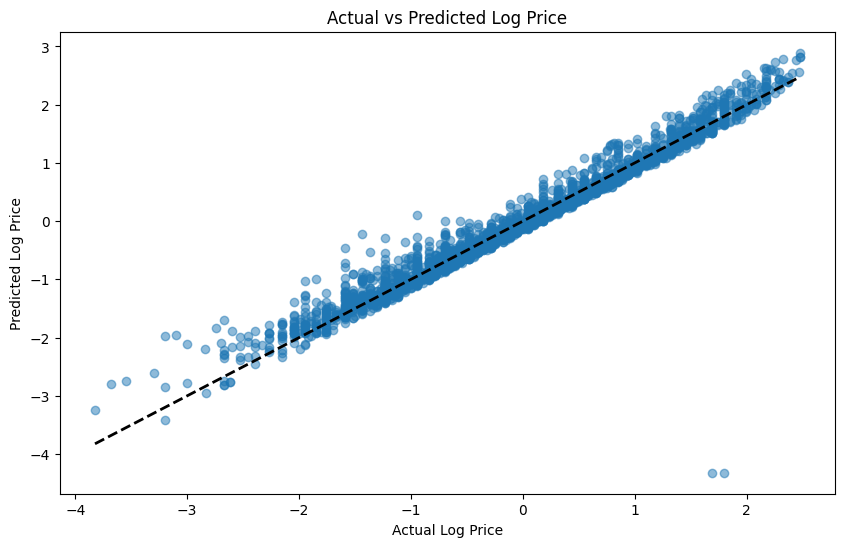

,Actual Price (Lakhs),Predicted Price (Lakhs)
1178,-0.215660,-0.285265
4460,0.548471,0.480082
5126,0.658997,0.485239
10657,-0.610654,-0.654208
8612,-0.107667,-0.102453


In [214]:
# Plotting Actual vs Predicted Prices (on a log scale)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line of perfect prediction
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Actual vs Predicted Log Price")
plt.show()

# Create a DataFrame to display actual vs predicted prices (converting back from log scale)
actual_price = np.exp(y_test) - 1
predicted_price = np.exp(y_pred) - 1

results_df = pd.DataFrame({'Actual Price (Lakhs)': actual_price, 'Predicted Price (Lakhs)': predicted_price})
display(results_df.head())